In [29]:
import numpy as np
from astroquery.mast import Catalogs
from astroquery.mast import Tesscut
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
fits_file_lc = "/Users/jshabazz/Downloads/MAST_2019-06-25T0953/TESS/product/tess2019112060037-s0011-0000000167602025-0143-s_lc.fits"
fits_file_tp = "/Users/jshabazz/Downloads/MAST_2019-06-25T0953/TESS/product/tess2019112060037-s0011-0000000167602025-0143-s_tp.fits"

In [39]:
fits.info(fits_file_lc)

Filename: /Users/jshabazz/Downloads/MAST_2019-06-25T0953/TESS/product/tess2019112060037-s0011-0000000167602025-0143-s_lc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      44   ()      
  1  LIGHTCURVE    1 BinTableHDU    167   19527R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
  2  APERTURE      1 ImageHDU        49   (11, 11)   int32   


In [40]:
fits.getdata(fits_file_lc, ext=1).columns

ColDefs(
    name = 'TIME'; format = 'D'; unit = 'BJD - 2457000, days'; disp = 'D14.7'
    name = 'TIMECORR'; format = 'E'; unit = 'd'; disp = 'E14.7'
    name = 'CADENCENO'; format = 'J'; disp = 'I10'
    name = 'SAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'SAP_BKG_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'PDCSAP_FLUX_ERR'; format = 'E'; unit = 'e-/s'; disp = 'E14.7'
    name = 'QUALITY'; format = 'J'; disp = 'B16.16'
    name = 'PSF_CENTR1'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR1_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'PSF_CENTR2'; format = 'D'; unit = 'pixel'; disp = 'F10.5'
    name = 'PSF_CENTR2_ERR'; format = 'E'; unit = 'pixel'; disp = 'E14.7'
    name = 'MOM_CENTR1'; format = 'D'; u

In [41]:
with fits.open(fits_file_lc, mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    sap_fluxes = hdulist[1].data['SAP_FLUX']
    pdcsape_fluxes = hdulist[1].data['PDCSAP_FLUX']

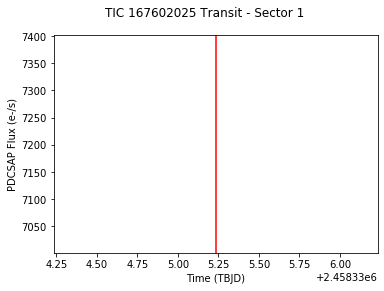

In [44]:
#PLOT LIGHT CURVE
t0 = 2458335.233 #transit time

fig, ax = plt.subplots()

ax.plot(tess_bjds, pdcsape_fluxes, 'ko')

ax.set_xlim(t0-1.0, t0 + 1.0)

ax.axvline(x=t0, color = 'red')

fig.suptitle("TIC 167602025 Transit - Sector 1")
ax.set_ylabel("PDCSAP Flux (e-/s)")
ax.set_xlabel("Time (TBJD)")

plt.subplots_adjust(left=0.15)
plt.show()